In [1]:
import zipfile as zp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [2]:
with zp.ZipFile("../dataset/KaggleV2-May-2016.csv.zip") as z:
    print(z.namelist())
    with z.open("KaggleV2-May-2016.csv") as f:
        df=pd.read_csv(f)

['KaggleV2-May-2016.csv']


In [3]:
print("Shape:",df.shape)
df.head()

Shape: (110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Data Cleaning

In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
df.columns=[col.strip().replace("-","_").lower() for col in df.columns]

In [7]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [8]:
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])

In [9]:
df['waiting_days']=(df['appointmentday']-df['scheduledday']).dt.days

In [10]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


In [11]:
df=df[df['age']>=0]

In [12]:
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,34
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,34
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,40
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,40


In [13]:
df['no_show']=df['no_show'].map({'Yes':1,'No':0})

In [14]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1


In [15]:
df.drop(['patientid','appointmentid'],axis=1,inplace=True)

In [16]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1


## Feature Engineering

In [17]:
df['appointment_weekday']=df['appointmentday'].dt.dayofweek
df['scheduled_weekday']=df['scheduledday'].dt.dayofweek

In [18]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days,appointment_weekday,scheduled_weekday
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1,4,4
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1,4,4
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1,4,4
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1,4,4
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1,4,4


In [19]:
binary_cols=['scholarship','hipertension','diabetes','alcoholism','sms_received','no_show']
df[binary_cols]=df[binary_cols].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   gender               110526 non-null  object             
 1   scheduledday         110526 non-null  datetime64[ns, UTC]
 2   appointmentday       110526 non-null  datetime64[ns, UTC]
 3   age                  110526 non-null  int64              
 4   neighbourhood        110526 non-null  object             
 5   scholarship          110526 non-null  int64              
 6   hipertension         110526 non-null  int64              
 7   diabetes             110526 non-null  int64              
 8   alcoholism           110526 non-null  int64              
 9   handcap              110526 non-null  int64              
 10  sms_received         110526 non-null  int64              
 11  no_show              110526 non-null  int64              
 12  waiting

In [21]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days,appointment_weekday,scheduled_weekday
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1,4,4
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1,4,4
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1,4,4
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1,4,4
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1,4,4


In [22]:
df.drop(['scheduledday','appointmentday'],axis=1,inplace=True)

In [23]:
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days,appointment_weekday,scheduled_weekday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1,4,4
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1,4,4
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1,4,4
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1,4,4
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1,4,4


## Exploratory Data Analysis

### Target Variable Balance

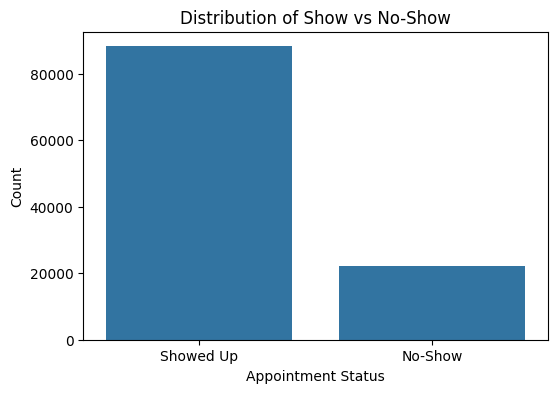

No-show rate: 20.19%


In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='no_show',data=df)
plt.xticks([0,1],['Showed Up','No-Show'])
plt.title('Distribution of Show vs No-Show')
plt.ylabel("Count")
plt.xlabel("Appointment Status")
plt.show()

no_show_rate=df['no_show'].value_counts(normalize=True)[1]*100
print(f"No-show rate: {no_show_rate:.2f}%")

### Age Distribution by Show/No-Show

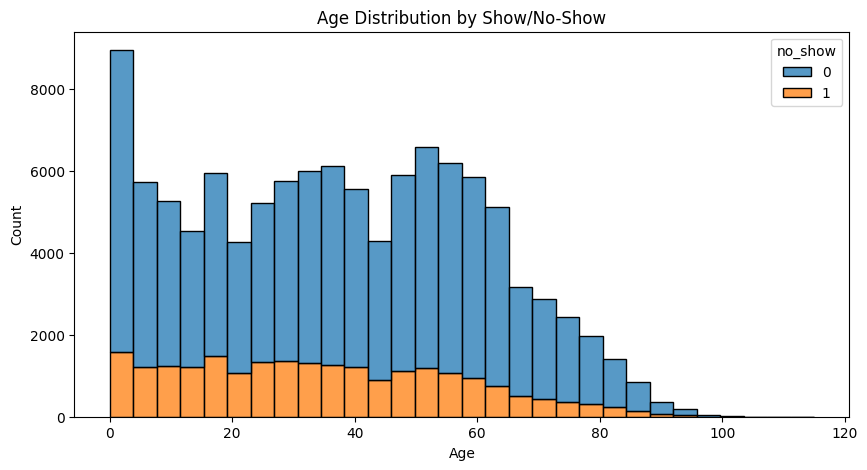

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='age',hue='no_show',bins=30,multiple='stack')
plt.title('Age Distribution by Show/No-Show')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Waiting Days vs No-Show

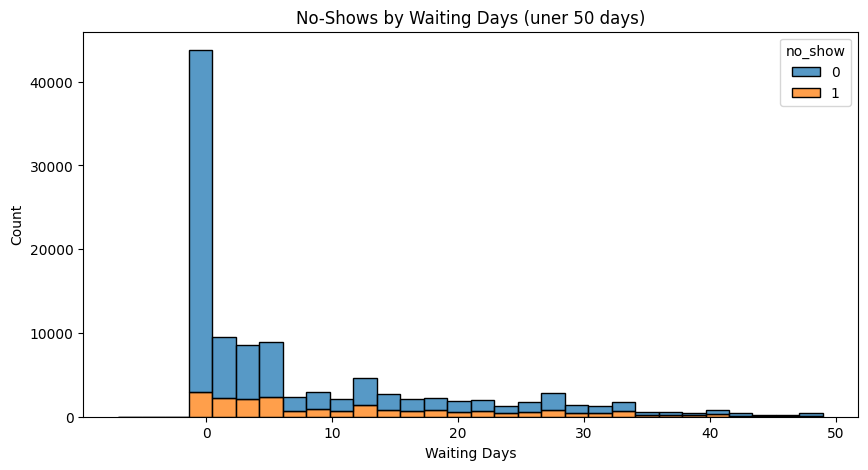

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(data=df[df['waiting_days']<50],x='waiting_days',hue='no_show',bins=30,multiple='stack')
plt.title('No-Shows by Waiting Days (uner 50 days)')
plt.xlabel('Waiting Days')
plt.ylabel('Count')
plt.show()

### Day of Week Analysis

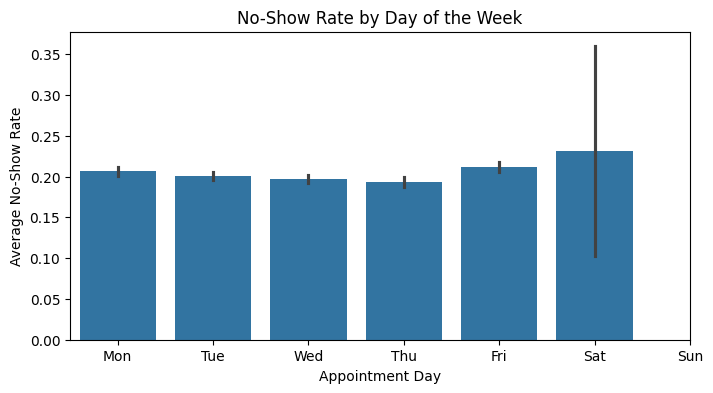

In [27]:
weekday_map=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.figure(figsize=(8,4))
sns.barplot(x='appointment_weekday',y='no_show',data=df)
plt.xticks(ticks=range(7),labels=weekday_map)
plt.title("No-Show Rate by Day of the Week")
plt.ylabel("Average No-Show Rate")
plt.xlabel("Appointment Day")
plt.show()

### SMS Received vs No-Show Rate

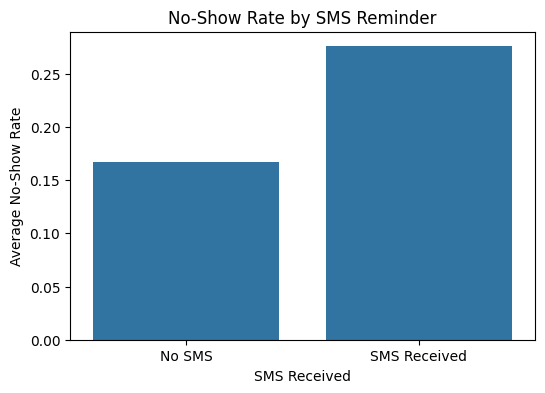

In [28]:
sms_data=df.groupby('sms_received')['no_show'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='sms_received',y='no_show',data=sms_data)
plt.xticks([0,1],['No SMS','SMS Received'])
plt.title("No-Show Rate by SMS Reminder")
plt.ylabel("Average No-Show Rate")
plt.xlabel("SMS Received")
plt.show()

### No-Show by Health Conditions

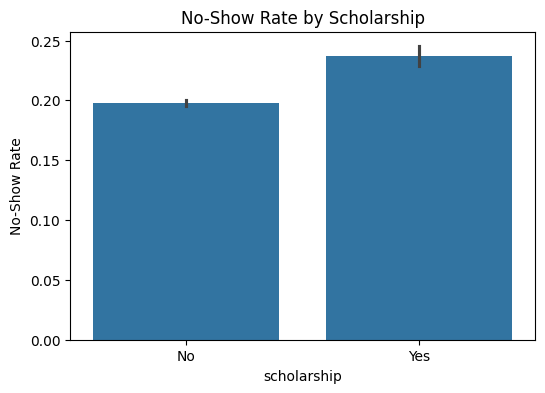

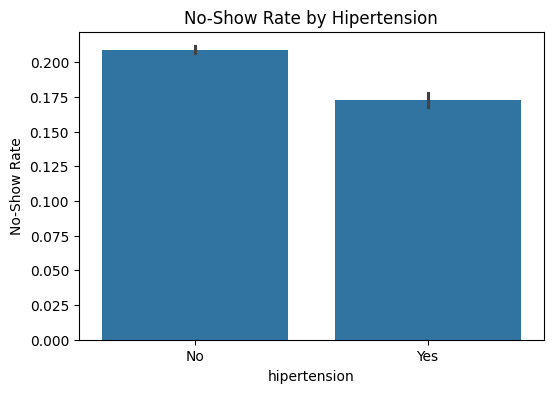

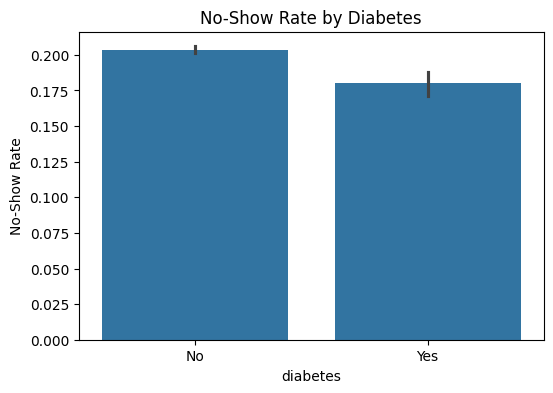

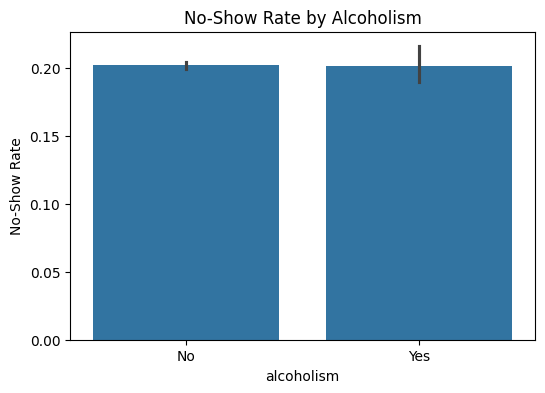

In [29]:
hc=['scholarship','hipertension','diabetes','alcoholism']

for c in hc:
    plt.figure(figsize=(6,4))
    sns.barplot(x=c,y='no_show',data=df)
    plt.xticks([0,1],['No','Yes'])
    plt.title(f"No-Show Rate by {c.capitalize()}")
    plt.ylabel("No-Show Rate")
    plt.show()

### Correlation Heatmap

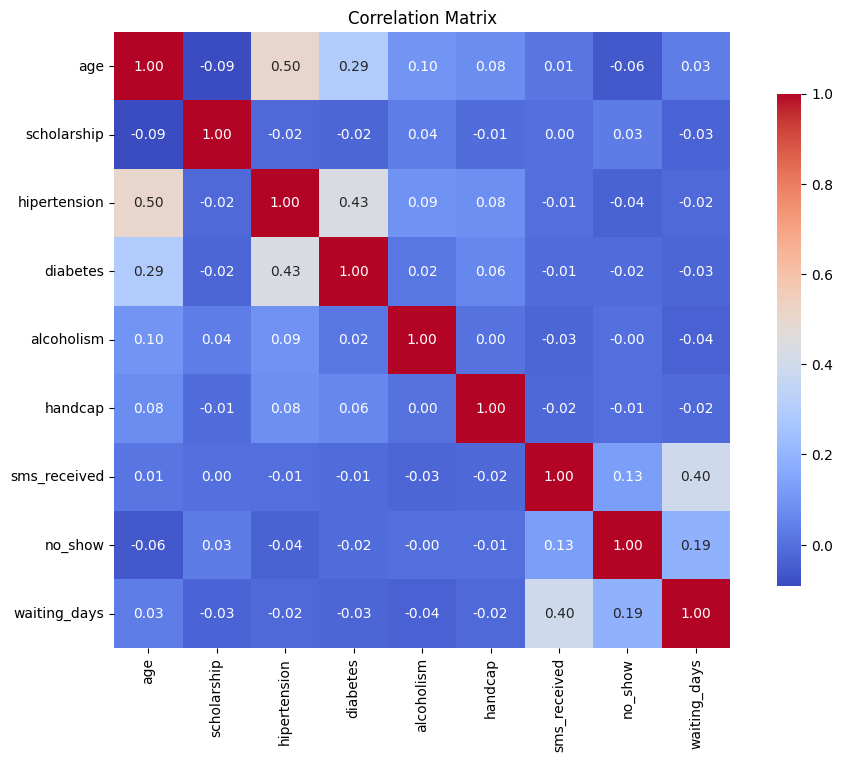

In [30]:
numeric_df=df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,8))
corr=numeric_df.corr()
sns.heatmap(corr,annot=True,fmt='.2f',cmap="coolwarm",square=True,cbar_kws={"shrink":.8})
plt.title("Correlation Matrix")
plt.show()

In [31]:
df.to_csv("processed_no_show.csv", index=False)